In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


## CAPM Regression (without Rf rate)
## Ri,t = αi + βi (Rm,t) + εi,t

In [3]:
import pandas as pd
import yfinance as yf
import datetime as dt
import statsmodels.api as sm

In [4]:
end = dt.datetime.now()
start = dt.date(end.year -5, end.month,end.day)
Input=['MSFT', '^GSPC']


In [5]:
df = yf.download(Input,start,end)['Adj Close']
df

[*********************100%***********************]  2 of 2 completed


,MSFT,^GSPC
Date,,
2016-07-21,51.406200,2165.169922
2016-07-22,52.115578,2175.030029
2016-07-25,52.262966,2168.479980
2016-07-26,52.290607,2169.179932
2016-07-27,51.765491,2166.580078
...,...,...
2021-07-15,281.029999,4360.029785
2021-07-16,280.750000,4327.160156
2021-07-19,277.010010,4258.490234


## Calculate Monthly Return


In [77]:
monthly_return = df.resample('M').ffill().pct_change()
monthly_return

,MSFT,^GSPC
Date,,
2016-07-31,NaN,NaN
2016-08-31,0.020080,-0.001219
2016-09-30,0.002437,-0.001234
2016-10-31,0.040278,-0.019426
2016-11-30,0.012468,0.034175
...,...,...
2021-03-31,0.014588,0.042439
2021-04-30,0.069602,0.052425
2021-05-31,-0.007627,0.005486


In [78]:
monthly_return = monthly_return.dropna(axis = 0)

In [79]:
monthly_return = monthly_return.iloc[1:,]

## Building Regression Model (CAPM)

## Defining X and Y (independent and dependent variable)

In [50]:
X = monthly_return['^GSPC'] # independent variable -> return on market portfolio at time t, Rm,t
Y = monthly_return['MSFT'] # dependent variable (R) -> return on microsoft at time t, Ri,t

X_sm = sm.add_constant(X)


In [51]:
model = sm.OLS(Y, X_sm)

In [52]:
results = model.fit()

In [53]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     60.26
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           1.53e-10
Time:                        16:55:11   Log-Likelihood:                 120.27
No. Observations:                  60   AIC:                            -236.5
Df Residuals:                      58   BIC:                            -232.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0198      0.004      4.427      0.000       0.011       0.029
^GSPC          0.7767      0.100      7.763      0.000       0.576       0.977
==============================================================================
Omnibus:                        1.527   Durbin-Watson:                   2.538
Prob(Omnibus):                  0.466   Jarque-Bera (JB):                1.540
Skew:                           0.343   Prob(JB):                        0.463
Kurtosis:                       2.620   Cond. No.                         23.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Beta is equal to the coefficient of ^GSPC which is 0.7767
### alpha is equal to the coefficient of const which is 0.01918

## Visualization

NameError: name 'plt' is not defined

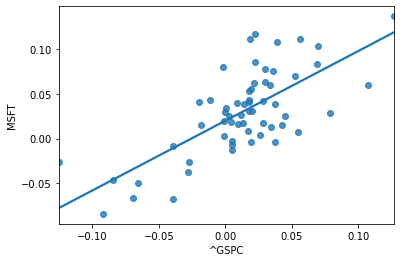

In [54]:
import seaborn as sns
sns.regplot( x="^GSPC", y="MSFT", data = monthly_return , ci=None)
plt.show()

# Taking consideration of risk-free rate
## Ri,t - rf = αi + βi (Rm,t - rf) + εi,t

In [55]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas_datareader.data as reader
rf= reader.DataReader('F-F_Research_Data_Factors', 'famafrench', start, end)[0].RF
rf[1:]

Date
2016-08    0.02
2016-09    0.02
2016-10    0.02
2016-11    0.01
2016-12    0.03
2017-01    0.04
2017-02    0.04
2017-03    0.03
2017-04    0.05
2017-05    0.06
2017-06    0.06
2017-07    0.07
2017-08    0.09
2017-09    0.09
2017-10    0.09
2017-11    0.08
2017-12    0.09
2018-01    0.11
2018-02    0.11
2018-03    0.12
2018-04    0.14
2018-05    0.14
2018-06    0.14
2018-07    0.16
2018-08    0.16
2018-09    0.15
2018-10    0.19
2018-11    0.18
2018-12    0.19
2019-01    0.21
2019-02    0.18
2019-03    0.19
2019-04    0.21
2019-05    0.21
2019-06    0.18
2019-07    0.19
2019-08    0.16
2019-09    0.18
2019-10    0.15
2019-11    0.12
2019-12    0.14
2020-01    0.13
2020-02    0.12
2020-03    0.12
2020-04    0.00
2020-05    0.01
2020-06    0.01
2020-07    0.01
2020-08    0.01
2020-09    0.01
2020-10    0.01
2020-11    0.01
2020-12    0.01
2021-01    0.00
2021-02    0.00
2021-03    0.00
2021-04    0.00
2021-05    0.00
Freq: M, Name: RF, dtype: float64

## subtracting the risk-free rate to get the excess return

In [81]:

monthly_return['MSFT-rf'], monthly_return['^GSPC-rf'] = monthly_return['MSFT']-rf.values, monthly_return['^GSPC']-rf.values

In [83]:
monthly_return.head()

,MSFT,^GSPC,MSFT-rf,^GSPC-rf
Date,,,,
2016-09-30,0.002437,-0.001234,-0.017563,-0.021234
2016-10-31,0.040278,-0.019426,0.020278,-0.039426
2016-11-30,0.012468,0.034175,-0.007532,0.014175
2016-12-31,0.031198,0.018201,0.011198,-0.001799
2017-01-31,0.040393,0.017884,0.030393,0.007884


## Building Regression Model from the above again (with Rf rate)
### Ri,t - rf = αi + βi (Rm,t - rf) + εi,t

In [84]:
X = monthly_return['^GSPC-rf'] # independent variable
Y = monthly_return['MSFT-rf'] # dependent variable

X_sm = sm.add_constant(X)

In [85]:
model = sm.OLS(Y, X_sm)

In [86]:
results = model.fit()

In [87]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MSFT-rf   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     329.2
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           2.37e-25
Time:                        17:03:15   Log-Likelihood:                 117.25
No. Observations:                  59   AIC:                            -230.5
Df Residuals:                      57   BIC:                            -226.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0094      0.006      1.624      0.110      -0.002       0.021
^GSPC-rf       0.9029      0.050     18.144      0.000       0.803       1.003
==============================================================================
Omnibus:                        2.251   Durbin-Watson:                   2.566
Prob(Omnibus):                  0.325   Jarque-Bera (JB):                2.004
Skew:                           0.447   Prob(JB):                        0.367
Kurtosis:                       2.871   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

NameError: name 'plt' is not defined

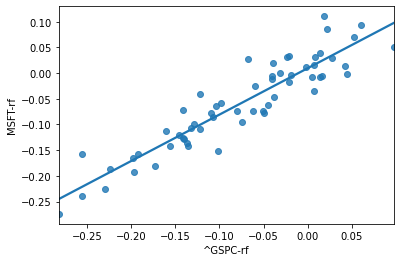

In [88]:
import seaborn as sns
sns.regplot( x="^GSPC-rf", y="MSFT-rf", data = monthly_return , ci=None)
plt.show()